# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

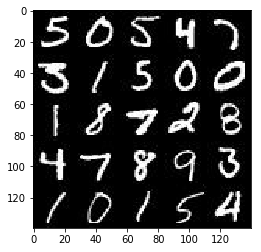

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

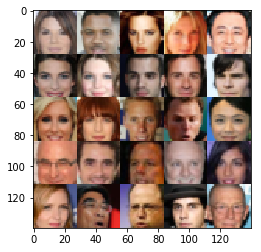

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    ip = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_real")
    z_ip = tf.placeholder(tf.float32, (None, z_dim), "input_z")
    l_r = tf.placeholder(tf.float32, name="lr")

    return ip, z_ip, l_r


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.15
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        r1 = tf.maximum(alpha * x1, x1)
        x2 = tf.layers.conv2d(r1, 128, 5, strides=2, padding='same')
        b2 = tf.layers.batch_normalization(x2, training=True)
        r2 = tf.maximum(alpha * b2, b2)
        x3 = tf.layers.conv2d(r2, 256, 5, strides=2, padding='same')
        b3 = tf.layers.batch_normalization(x3, training=True)
        r3 = tf.maximum(alpha * b3, b3)
        flatten = tf.reshape(r3, (-1, 4*4*256))
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.15
    k_p = 0.9
    with tf.variable_scope('generator', reuse=not is_train):
        gen1 = tf.layers.dense(z, 7*7*512)
        gen1 = tf.reshape(gen1, (-1, 7, 7, 512))
        gen1 = tf.layers.batch_normalization(gen1, training=is_train)
        gen1 = tf.maximum(alpha * gen1, gen1)
        gen2 = tf.layers.conv2d_transpose(gen1, 256, 5, strides=2, padding='same', activation=None)
        gen2 = tf.layers.batch_normalization(gen2, training=is_train)
        gen2 = tf.maximum(alpha * gen2, gen2)
        gen2 = tf.nn.dropout(gen2, keep_prob=k_p)
        gen3 = tf.layers.conv2d_transpose(gen2, 128, 5, strides=2, padding='same', activation=None)
        gen3 = tf.layers.batch_normalization(gen3, training=is_train)
        gen3 = tf.maximum(alpha * gen3, gen3)   
        gen3 = tf.nn.dropout(gen3, keep_prob=k_p)
        logits = tf.layers.conv2d_transpose(gen3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        outputs = tf.tanh(logits)
        return outputs


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.15
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * alpha))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_t_o = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_t_o = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_t_o, g_t_o

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    ip_real, ip_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(ip_real, ip_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
            
                for batch_images in get_batches(batch_size):
                    steps +=1
                    batch_images = batch_images * 2
                    batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                    _ = sess.run(d_opt, feed_dict={ip_real: batch_images, ip_z: batch_z, lr: learning_rate})
                    _ = sess.run(g_opt, feed_dict={ip_real: batch_images, ip_z: batch_z, lr: learning_rate})
                    if steps % 20 == 0:
                        train_loss_d = d_loss.eval({ip_real: batch_images, ip_z: batch_z})
                        train_loss_g = g_loss.eval({ip_z: batch_z})
                        print("Epoch {}/{}...".format(epoch_i+1, epochs),"Batch {}...".format(steps),"Discriminator Loss: {:.4f}...".format(train_loss_d),"Generator Loss: {:.4f}".format(train_loss_g))
                    if steps % 50 == 0:
                        show_generator_output(sess, show_n_images, ip_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 20... Discriminator Loss: 0.7052... Generator Loss: 9.5773
Epoch 1/2... Batch 40... Discriminator Loss: 0.4978... Generator Loss: 4.1640


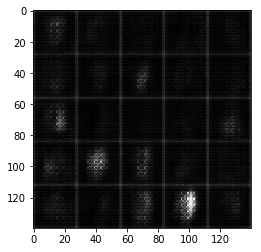

Epoch 1/2... Batch 60... Discriminator Loss: 0.5911... Generator Loss: 4.0569
Epoch 1/2... Batch 80... Discriminator Loss: 0.5808... Generator Loss: 2.1398
Epoch 1/2... Batch 100... Discriminator Loss: 0.5825... Generator Loss: 2.0589


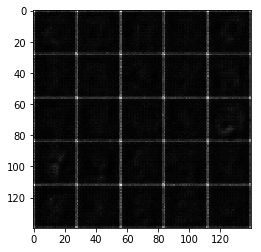

Epoch 1/2... Batch 120... Discriminator Loss: 0.5640... Generator Loss: 2.0915
Epoch 1/2... Batch 140... Discriminator Loss: 0.5580... Generator Loss: 2.1404


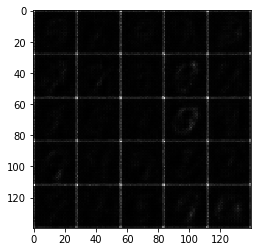

Epoch 1/2... Batch 160... Discriminator Loss: 0.5739... Generator Loss: 2.0926
Epoch 1/2... Batch 180... Discriminator Loss: 0.5629... Generator Loss: 2.1224
Epoch 1/2... Batch 200... Discriminator Loss: 0.5781... Generator Loss: 2.0613


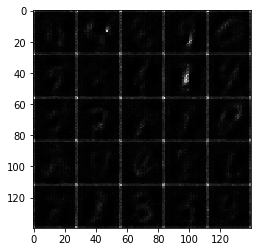

Epoch 1/2... Batch 220... Discriminator Loss: 0.5732... Generator Loss: 2.0781
Epoch 1/2... Batch 240... Discriminator Loss: 0.5734... Generator Loss: 2.0498


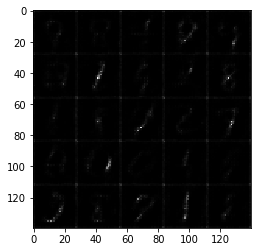

Epoch 1/2... Batch 260... Discriminator Loss: 0.5553... Generator Loss: 2.1801
Epoch 1/2... Batch 280... Discriminator Loss: 0.5503... Generator Loss: 2.2858
Epoch 1/2... Batch 300... Discriminator Loss: 0.5890... Generator Loss: 2.0029


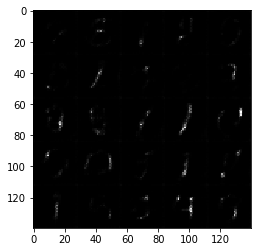

Epoch 1/2... Batch 320... Discriminator Loss: 0.5804... Generator Loss: 2.0199
Epoch 1/2... Batch 340... Discriminator Loss: 0.5499... Generator Loss: 2.2560


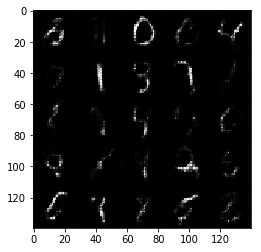

Epoch 1/2... Batch 360... Discriminator Loss: 0.5249... Generator Loss: 2.9506
Epoch 1/2... Batch 380... Discriminator Loss: 0.6468... Generator Loss: 4.1642
Epoch 1/2... Batch 400... Discriminator Loss: 0.5392... Generator Loss: 3.0031


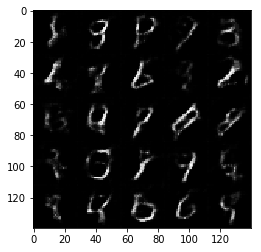

Epoch 1/2... Batch 420... Discriminator Loss: 0.5475... Generator Loss: 3.1013
Epoch 1/2... Batch 440... Discriminator Loss: 0.5299... Generator Loss: 3.4868


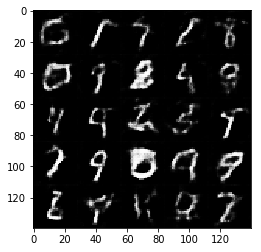

Epoch 1/2... Batch 460... Discriminator Loss: 0.5458... Generator Loss: 3.1880
Epoch 1/2... Batch 480... Discriminator Loss: 0.5434... Generator Loss: 3.2403
Epoch 1/2... Batch 500... Discriminator Loss: 0.5615... Generator Loss: 3.3704


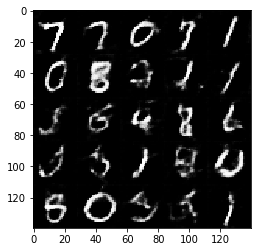

Epoch 1/2... Batch 520... Discriminator Loss: 0.5588... Generator Loss: 3.2771
Epoch 1/2... Batch 540... Discriminator Loss: 0.5566... Generator Loss: 3.4933


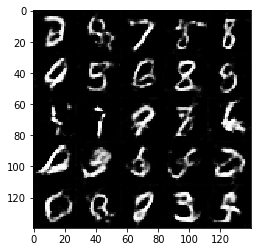

Epoch 1/2... Batch 560... Discriminator Loss: 0.5418... Generator Loss: 3.1272
Epoch 1/2... Batch 580... Discriminator Loss: 0.5402... Generator Loss: 3.1261
Epoch 1/2... Batch 600... Discriminator Loss: 0.5337... Generator Loss: 3.0682


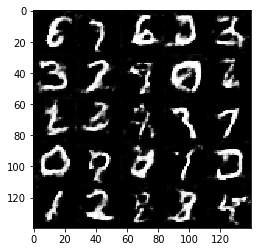

Epoch 1/2... Batch 620... Discriminator Loss: 0.5697... Generator Loss: 3.6800
Epoch 1/2... Batch 640... Discriminator Loss: 0.5911... Generator Loss: 3.8439


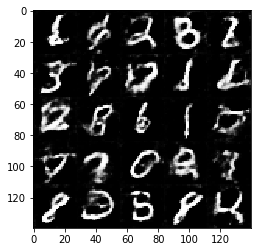

Epoch 1/2... Batch 660... Discriminator Loss: 0.5384... Generator Loss: 3.1222
Epoch 1/2... Batch 680... Discriminator Loss: 0.5371... Generator Loss: 3.1235
Epoch 1/2... Batch 700... Discriminator Loss: 0.5483... Generator Loss: 3.3078


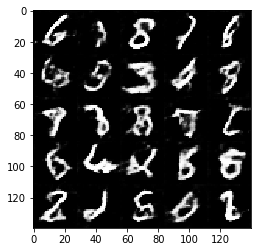

Epoch 1/2... Batch 720... Discriminator Loss: 0.5495... Generator Loss: 3.2245
Epoch 1/2... Batch 740... Discriminator Loss: 0.5561... Generator Loss: 3.3975


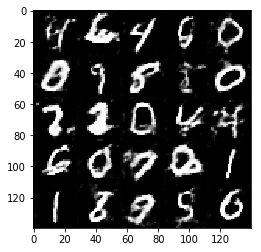

Epoch 1/2... Batch 760... Discriminator Loss: 0.5485... Generator Loss: 3.1513


KeyboardInterrupt: 

In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0008
beta1 = 0.1 #0.5 before


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 20... Discriminator Loss: 0.6970... Generator Loss: 6.3907
Epoch 1/1... Batch 40... Discriminator Loss: 0.5475... Generator Loss: 2.7121


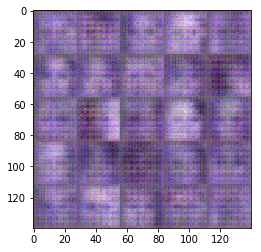

Epoch 1/1... Batch 60... Discriminator Loss: 0.6856... Generator Loss: 5.1112
Epoch 1/1... Batch 80... Discriminator Loss: 0.5497... Generator Loss: 3.0897
Epoch 1/1... Batch 100... Discriminator Loss: 0.5439... Generator Loss: 2.2979


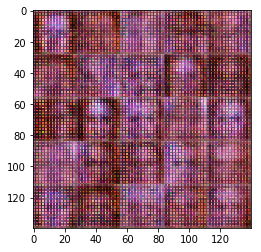

Epoch 1/1... Batch 120... Discriminator Loss: 0.5468... Generator Loss: 2.3683
Epoch 1/1... Batch 140... Discriminator Loss: 0.5802... Generator Loss: 2.0056


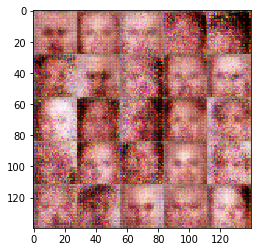

Epoch 1/1... Batch 160... Discriminator Loss: 0.5528... Generator Loss: 2.2353
Epoch 1/1... Batch 180... Discriminator Loss: 0.5672... Generator Loss: 2.1136
Epoch 1/1... Batch 200... Discriminator Loss: 0.5671... Generator Loss: 2.1938


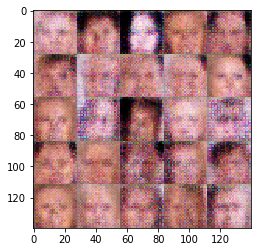

Epoch 1/1... Batch 220... Discriminator Loss: 0.5702... Generator Loss: 2.1356
Epoch 1/1... Batch 240... Discriminator Loss: 0.5574... Generator Loss: 2.6651


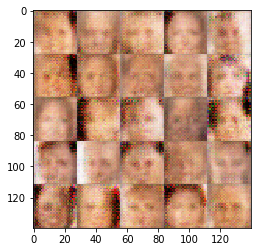

Epoch 1/1... Batch 260... Discriminator Loss: 0.5420... Generator Loss: 2.3735
Epoch 1/1... Batch 280... Discriminator Loss: 0.5533... Generator Loss: 2.2935
Epoch 1/1... Batch 300... Discriminator Loss: 0.5596... Generator Loss: 2.4171


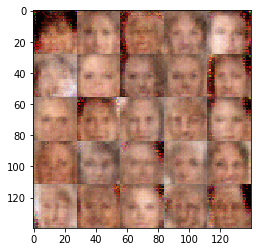

Epoch 1/1... Batch 320... Discriminator Loss: 0.5502... Generator Loss: 2.6108
Epoch 1/1... Batch 340... Discriminator Loss: 0.5525... Generator Loss: 2.2622


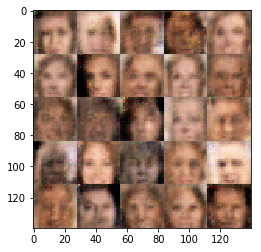

Epoch 1/1... Batch 360... Discriminator Loss: 0.5262... Generator Loss: 2.5073
Epoch 1/1... Batch 380... Discriminator Loss: 0.5662... Generator Loss: 2.0909
Epoch 1/1... Batch 400... Discriminator Loss: 0.5497... Generator Loss: 3.0167


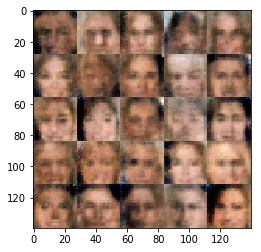

Epoch 1/1... Batch 420... Discriminator Loss: 0.5393... Generator Loss: 2.9208
Epoch 1/1... Batch 440... Discriminator Loss: 0.5232... Generator Loss: 2.7089


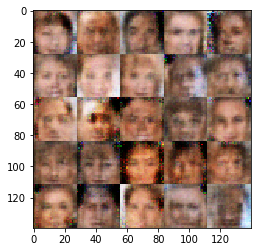

Epoch 1/1... Batch 460... Discriminator Loss: 0.5519... Generator Loss: 2.2221
Epoch 1/1... Batch 480... Discriminator Loss: 0.5641... Generator Loss: 2.2743
Epoch 1/1... Batch 500... Discriminator Loss: 0.5410... Generator Loss: 2.3626


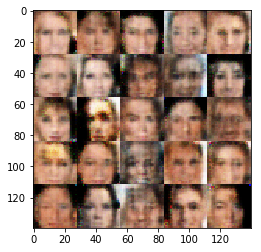

Epoch 1/1... Batch 520... Discriminator Loss: 0.5476... Generator Loss: 2.2917
Epoch 1/1... Batch 540... Discriminator Loss: 0.5365... Generator Loss: 2.4262


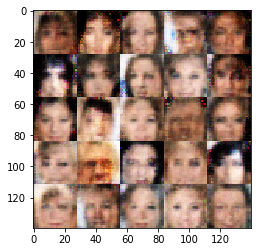

Epoch 1/1... Batch 560... Discriminator Loss: 0.5524... Generator Loss: 2.5602
Epoch 1/1... Batch 580... Discriminator Loss: 0.5343... Generator Loss: 2.5964
Epoch 1/1... Batch 600... Discriminator Loss: 0.5452... Generator Loss: 2.3521


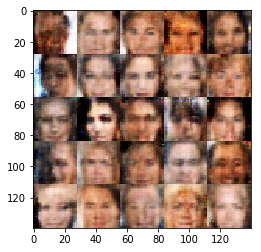

Epoch 1/1... Batch 620... Discriminator Loss: 0.5529... Generator Loss: 3.0810
Epoch 1/1... Batch 640... Discriminator Loss: 0.5389... Generator Loss: 2.6364


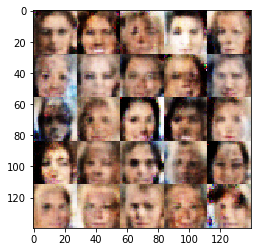

Epoch 1/1... Batch 660... Discriminator Loss: 0.5409... Generator Loss: 2.5880
Epoch 1/1... Batch 680... Discriminator Loss: 0.5472... Generator Loss: 2.3121
Epoch 1/1... Batch 700... Discriminator Loss: 0.5488... Generator Loss: 2.5381


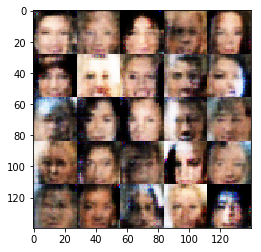

Epoch 1/1... Batch 720... Discriminator Loss: 0.5533... Generator Loss: 2.3146
Epoch 1/1... Batch 740... Discriminator Loss: 0.5366... Generator Loss: 2.8166


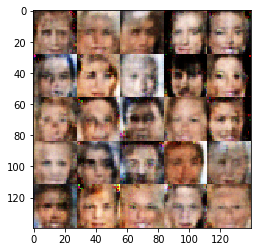

Epoch 1/1... Batch 760... Discriminator Loss: 0.5324... Generator Loss: 2.4104
Epoch 1/1... Batch 780... Discriminator Loss: 0.5364... Generator Loss: 2.6329
Epoch 1/1... Batch 800... Discriminator Loss: 0.5544... Generator Loss: 2.6780


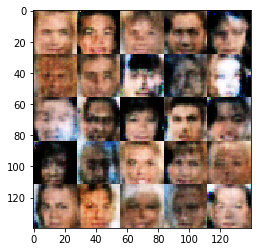

Epoch 1/1... Batch 820... Discriminator Loss: 0.5319... Generator Loss: 2.8469
Epoch 1/1... Batch 840... Discriminator Loss: 0.5572... Generator Loss: 2.2166


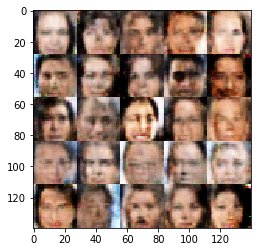

Epoch 1/1... Batch 860... Discriminator Loss: 0.5393... Generator Loss: 2.4209
Epoch 1/1... Batch 880... Discriminator Loss: 0.5468... Generator Loss: 2.3205
Epoch 1/1... Batch 900... Discriminator Loss: 0.5540... Generator Loss: 2.1467


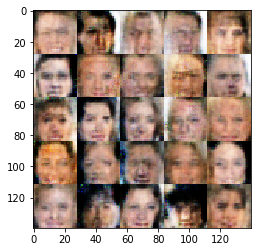

Epoch 1/1... Batch 920... Discriminator Loss: 0.5375... Generator Loss: 2.3741
Epoch 1/1... Batch 940... Discriminator Loss: 0.5427... Generator Loss: 2.8479


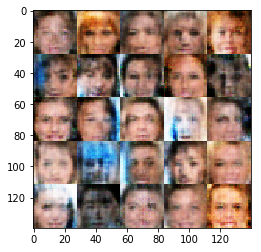

Epoch 1/1... Batch 960... Discriminator Loss: 0.5409... Generator Loss: 2.4749
Epoch 1/1... Batch 980... Discriminator Loss: 0.5325... Generator Loss: 2.7733
Epoch 1/1... Batch 1000... Discriminator Loss: 0.5314... Generator Loss: 2.5502


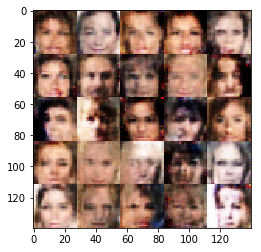

Epoch 1/1... Batch 1020... Discriminator Loss: 0.5439... Generator Loss: 2.6487
Epoch 1/1... Batch 1040... Discriminator Loss: 0.5385... Generator Loss: 2.8516


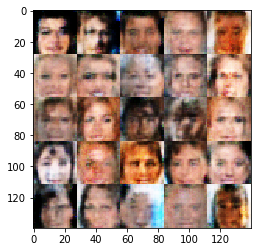

Epoch 1/1... Batch 1060... Discriminator Loss: 0.5395... Generator Loss: 2.4342
Epoch 1/1... Batch 1080... Discriminator Loss: 0.5518... Generator Loss: 2.9644
Epoch 1/1... Batch 1100... Discriminator Loss: 0.5397... Generator Loss: 2.4796


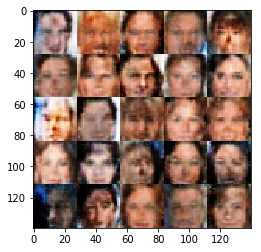

Epoch 1/1... Batch 1120... Discriminator Loss: 0.5366... Generator Loss: 2.5802
Epoch 1/1... Batch 1140... Discriminator Loss: 0.5375... Generator Loss: 2.4008


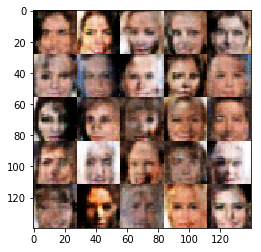

Epoch 1/1... Batch 1160... Discriminator Loss: 0.5363... Generator Loss: 2.6077
Epoch 1/1... Batch 1180... Discriminator Loss: 0.5490... Generator Loss: 2.3663
Epoch 1/1... Batch 1200... Discriminator Loss: 0.5395... Generator Loss: 2.4146


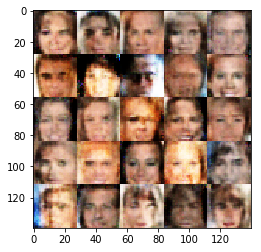

Epoch 1/1... Batch 1220... Discriminator Loss: 0.5388... Generator Loss: 2.3588
Epoch 1/1... Batch 1240... Discriminator Loss: 0.5347... Generator Loss: 2.4786


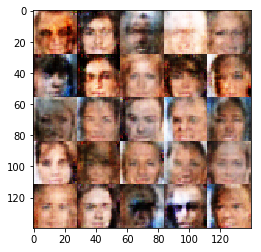

Epoch 1/1... Batch 1260... Discriminator Loss: 0.5566... Generator Loss: 2.8380
Epoch 1/1... Batch 1280... Discriminator Loss: 0.5351... Generator Loss: 2.3726
Epoch 1/1... Batch 1300... Discriminator Loss: 0.5372... Generator Loss: 2.5309


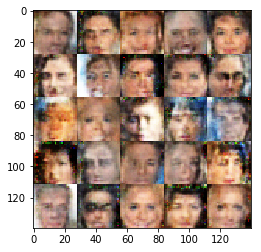

Epoch 1/1... Batch 1320... Discriminator Loss: 0.5308... Generator Loss: 2.6663
Epoch 1/1... Batch 1340... Discriminator Loss: 0.5381... Generator Loss: 2.5442


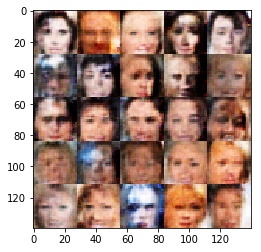

Epoch 1/1... Batch 1360... Discriminator Loss: 0.5375... Generator Loss: 2.6017
Epoch 1/1... Batch 1380... Discriminator Loss: 0.5397... Generator Loss: 2.4310
Epoch 1/1... Batch 1400... Discriminator Loss: 0.5386... Generator Loss: 2.4746


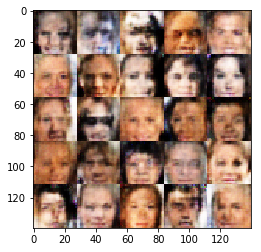

Epoch 1/1... Batch 1420... Discriminator Loss: 0.5365... Generator Loss: 2.5618
Epoch 1/1... Batch 1440... Discriminator Loss: 0.5366... Generator Loss: 2.4647


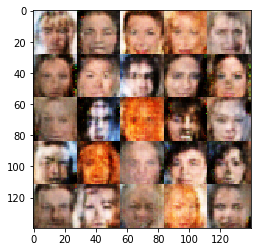

Epoch 1/1... Batch 1460... Discriminator Loss: 0.5390... Generator Loss: 2.6918
Epoch 1/1... Batch 1480... Discriminator Loss: 0.5454... Generator Loss: 2.8459
Epoch 1/1... Batch 1500... Discriminator Loss: 0.5375... Generator Loss: 2.4884


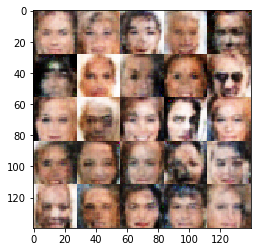

KeyboardInterrupt: 

In [15]:
batch_size = 128
z_dim = 100
learning_rate = 0.0008
beta1 = 0.1 #0.5 before


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.